In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
bonds = pd.read_csv ('../../dataset/Indicators/bonds.csv', encoding='unicode_escape')
pmi = pd.read_csv ('../../dataset/Indicators/pmi_.csv', encoding='unicode_escape')

In [48]:
def cleaned_indicator(df): 
    df['time'] = df['time'].str.extract('(\d{4}-\d{2}-\d{2})', expand=True)
    df['time'] = pd.to_datetime(df["time"])
    df.set_index('time', inplace=True)
    df= df.reindex(pd.date_range(start=df.index.min(),
                                                  end=df.index.max(),
                                                  freq='1D'))
    df.interpolate(method='linear', inplace=True)
    df.index.names = ['Dates']
    df = df[(df.index >= '1976-06-01') & (df.index <= '2022-11-02')]
    return df

In [49]:
pmi = cleaned_indicator(pmi)
bonds = cleaned_indicator(bonds)

In [52]:
def pmi_and_bonds_comparison():
    fig, (ax1, ax2) = plt.subplots(2)
    fig.suptitle('Comparison between PMI variation and bonds spread variation (1970-2022)')

    #ax1
    pmi.close.plot.line(ax = ax1)
    bonds.close.plot.line(ax = ax2)
    ax1.axhline(y=50, c="red", linewidth=2, zorder=0)
    ax1.axhline(y=40, c="black", linewidth=2, linestyle = 'dotted', zorder=0)
    ax1.axhline(y=60, c="black", linewidth=2, linestyle = 'dotted', zorder=0)
    ax1.set_title('PMI')
    ax1.set(xlabel='Years', ylabel='%')

    #ax2
    ax2.axhline(y=0, c="red", linewidth=2, zorder=0)
    ax2.set_title('US 10Y minus 2Y bond spread')
    ax2.set(xlabel='Years', ylabel='%')

    #plot
    fig.tight_layout()
    plt.style.use('seaborn')
    return plt.show()

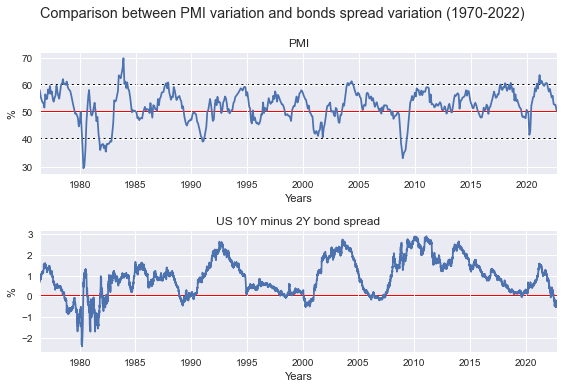

In [54]:
pmi_and_bonds_comparison()